In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy import *
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# BFGS
----------

In [17]:
epsilon = 10e-5

def BFGSUpdate(xk, Bk, deriv1_xk, Q):
    """
        xk:        Current value 
        Bk:        Approximated 2nd order matrix
        deriv1_xk: First order derivative of function f(xk)
        Q :        Q formed when we convert the function in standard form
                   Also equivallent to Hessian matrix, Computation is needed only once
                   No update is required
        
        pk (Search direction) = - inv(Bk).deriv1_xk 
    """
#     print('')
#     print('')
#     print(Bk)
#     print('')
#     print(deriv1_xk)
#     print('')
#     print('')
    pk = -1 * np.dot(np.linalg.inv(Bk),deriv1_xk)
    alpha = np.dot(np.transpose(pk), deriv1_xk) / np.dot(np.dot(np.transpose(pk), Q), pk)
    xk1 = xk - alpha*pk
    return xk1

def updateBk(step, deriv_1, xk, xk1, gradient_xk, Bk, numVariables):
    """
        step:             Step Num, int
        deriv_1           1st order derivative of the input function 
        xk:               previous solution
        xk1:              New Solution
        gradient_xk:      deriv_1 evaluated at xk1
        Bk:               Approximated 2nd order matrix
    """
    if numVariables == 3:
        gradient_xk1 =  np.array([eq.evalf(subs={x1:xk1[0], x2:xk1[1], x3:xk1[2]}) 
                                  for eq in deriv_1], dtype='float32')
    elif numVariables == 2:
        gradient_xk1 =  np.array([eq.evalf(subs={x1:xk1[0], x2:xk1[1]}) 
                                  for eq in deriv_1], dtype='float32')
    else:
        raise ValueError('Num Features doesnt match the hadled condition')
        
#     print ('Gradient at xk%s: '%str(step), gradient_xk1)
    Sk = xk1 - xk
    Sk = np.array(Sk).reshape(len(Sk), 1)
#     print ('Sk at xk%s: %s \n'%(str(step), str(Sk.shape)), Sk)
    Yk = gradient_xk1 - gradient_xk
    Yk = np.array(Yk).reshape(len(Yk), 1)
#     print ('Yk at xk%s: %s \n'%(str(step), str(Yk.shape)), Yk)
    numerator = np.dot(np.dot(Bk,Sk),np.transpose(np.dot(Bk,Sk)))
#     print ('numerator at xk%s: \n'%str(step), numerator)
    denominator = np.dot(np.transpose(Sk),np.dot(Bk,Sk))
#     print ('denominator at xk%s: \n'%str(step), denominator)
    RHS = np.dot(Yk, np.transpose(Yk))/np.dot(np.transpose(Yk), Yk)
#     print ('RHS at xk%s: \n'%str(step), RHS)
    Bk1 = Bk - (numerator/denominator) + RHS
#     print ('BkBkBkBkBkBkBkBkBkBkBkBkBk\n', Bk1)
    return Bk1

def iterate(f, xk, deriv_1, Q, Bk, numFeatures, numSteps, should_print):
    fx_arr = []
    gradientNorm_arr = []
    for step in range(numSteps):
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) for eq in deriv_1], 
                                   dtype='float32')
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], 
                                   dtype='float32')
        else:
            raise ValueError('Num Features doesnt match the hadled condition')
        
        fx_arr.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value Bk%s is \n'%(step+1), Bk)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
                
                
#         print ('Gradient at xk%s is: '%str(step), gradient_xk)
#         gradientNorm = np.linalg.norm(gradient_xk)
#         print ("####### Gradient Norm: ", gradientNorm)
#         if gradientNorm == 0:
#             break
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            break
            
#         print ('xk at step %s: \n'%str(step), xk)
        xk1 = BFGSUpdate(xk=xk, Bk=Bk, deriv1_xk=gradient_xk, Q=Q)
#         print ('xk1 at step %s: \n'%str(step), xk1)
        
        Bk1 = updateBk(step+1, deriv_1, xk, xk1, gradient_xk, Bk, numVariables=numFeatures)

        # Parameter UPdate
        xk = xk1
        Bk = Bk1

    return fx_arr, gradientNorm_arr


def plot(x_arr, rows=1, columns=2, figsize=(12, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(x_arr):
        axs[no].plot(np.arange(len(arrVal)), arrVal)

#### Solution d(1)

First order Derivative:  [2*x1 2*x2 2*x3]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.4641
The updated Value Bk1 is 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
The updated Value xk1 is 
 [1 1 1]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value Bk2 is 
 [[  1.00000001e+00   9.93410748e-09   9.93410748e-09]
 [  9.93410748e-09   1.00000001e+00   9.93410748e-09]
 [  9.93410748e-09   9.93410748e-09   1.00000001e+00]]
The updated Value xk2 is 
 [ 0.  0.  0.]


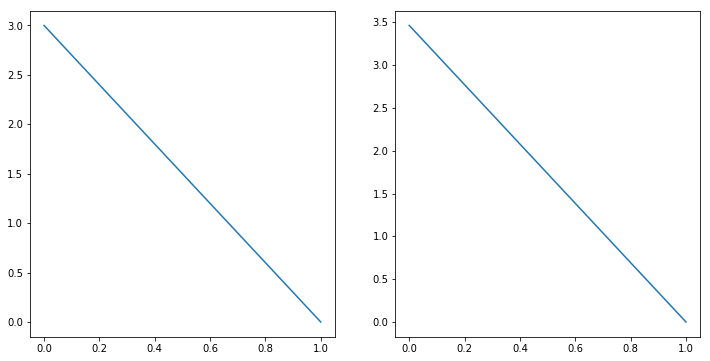

In [18]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')

f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_f_x1 = f.diff(x1)
deriv_f_x2 = f.diff(x2)
deriv_f_x3 = f.diff(x3)

f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
print ('First order Derivative: ', deriv_1)
Q = np.array([[2,0,0],[0,2,0],[0,0,2]])  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case

# Initialize BK
Bk = np.eye(3)

# Initialize Xk
xk = np.array([1,1,1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, Bk, numFeatures=3, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])

#### Solution d(2)


##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk0 is:  [ 0. -2.]
####### Gradient Norm:  2.0
The updated Value Bk1 is 
 [[ 1.  0.]
 [ 0.  1.]]
The updated Value xk1 is 
 [ 0.  0.]

##########################################################
Function F at x: f(x)  -0.500000000000000
Gradient at xk1 is:  [-1.  0.]
####### Gradient Norm:  1.0
The updated Value Bk2 is 
 [[ 1.2        -0.40000001]
 [-0.40000001  0.80000001]]
The updated Value xk2 is 
 [ 0.   0.5]

##########################################################
Function F at x: f(x)  -1.00000000000000
Gradient at xk2 is:  [ 0.  0.]
####### Gradient Norm:  0.0
The updated Value Bk3 is 
 [[ 1.2        -0.40000001]
 [-0.40000001  0.80000001]]
The updated Value xk3 is 
 [ 1.  1.]


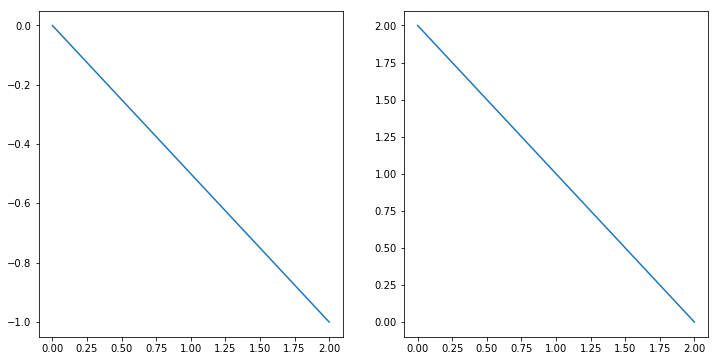

In [22]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]], dtype=float)
# print ('Q: \n', Q)

# Initialize BK
Bk = np.eye(2)

# Initialize Xk
xk = np.array([0,0], dtype=float)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])